# Clustering
* [make dataset: moons, circes and blobs](#1)
* [Agglomerative Clusterring](#2)
* [K-means](#3)
* [t-SNE and K-means](#4)

## Create a data set for clustering <a class='anchor' id='1'></a>
We create a data set to cluster using sklearn methods of make moons, circles and blobs to investigate different data shapes

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import rand_score, adjusted_rand_score

In [134]:
n_samples = 200
x_blobs, y_blobs = make_blobs(n_samples = n_samples, n_features=2, centers = 4)
x_circles, y_circles = make_circles(n_samples = n_samples, noise=0.05, factor= 0.5, random_state=3)
x_moons, y_moons = make_moons(n_samples = n_samples, noise=0.05, random_state=3)

data_sets = [(x_blobs, y_blobs), (x_circles, y_circles), (x_moons, y_moons)]
labels = ['Bloobs', 'Circles', 'Moons']

In [135]:
def plot_dataset(datasets, labels, title = 'Datasets Classes'):
    assert len(datasets) == len(labels)
    
    fig, ax = plt.subplots(1, 3, figsize = (10, 5))
    
    for i in range(len(datasets)):
        x, y = datasets[i]
        ax[i].scatter(x[:,0], x[:, 1], c = y)
        ax[i].axis('equal')
        ax[i].set_title(labels[i])
    
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()  

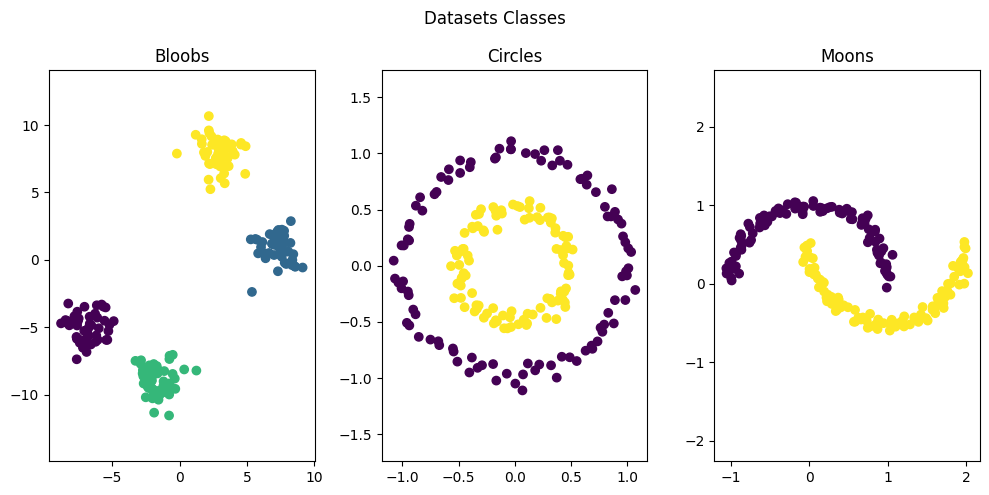

In [136]:
plot_dataset(data_sets, labels)

In [111]:
# define a function to measure accuracy
# since there is no concistanct between the int values of the labels
# between the original labels and the predicted 
# we have to find the best permutation

from itertools import permutations

def accuracy(y, y_hat):
    # n is the number of clusters
    assert y.shape == y_hat.shape
    n = len(set(y))
    scores = []
    for perm in permutations(list(range(n))):
        y_perm = np.array([perm[value] for value in y])
        scores.append(sum(y_perm == y_hat))
    
    return max(scores)/len(y)

## Aglomerative Clustering <a class='anchor' id='2'></a>

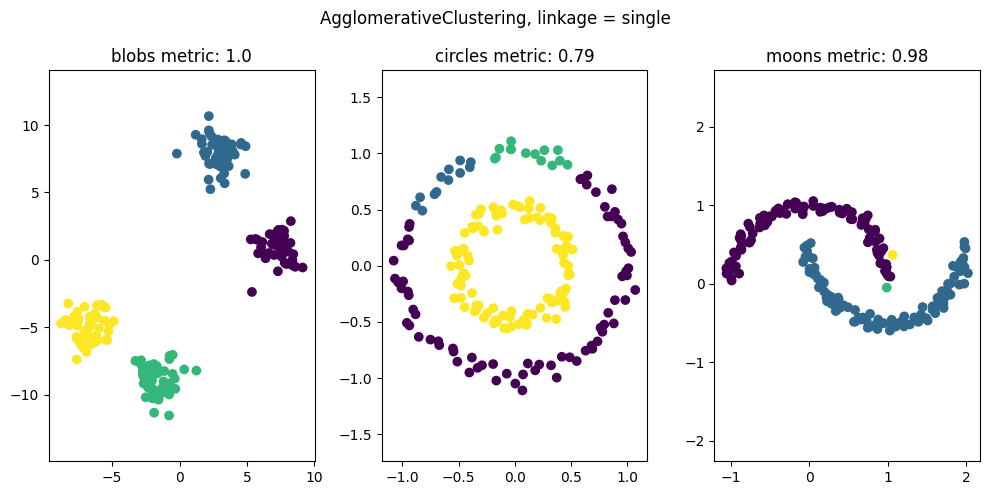

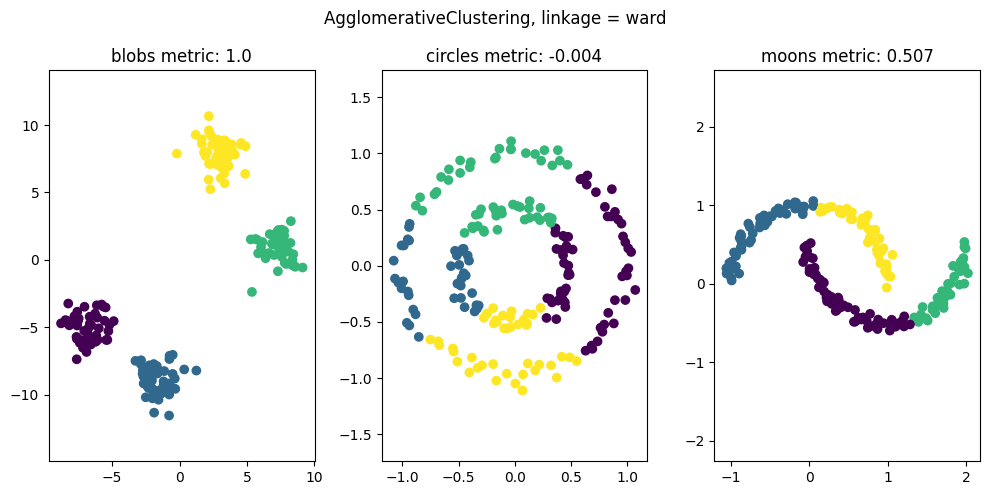

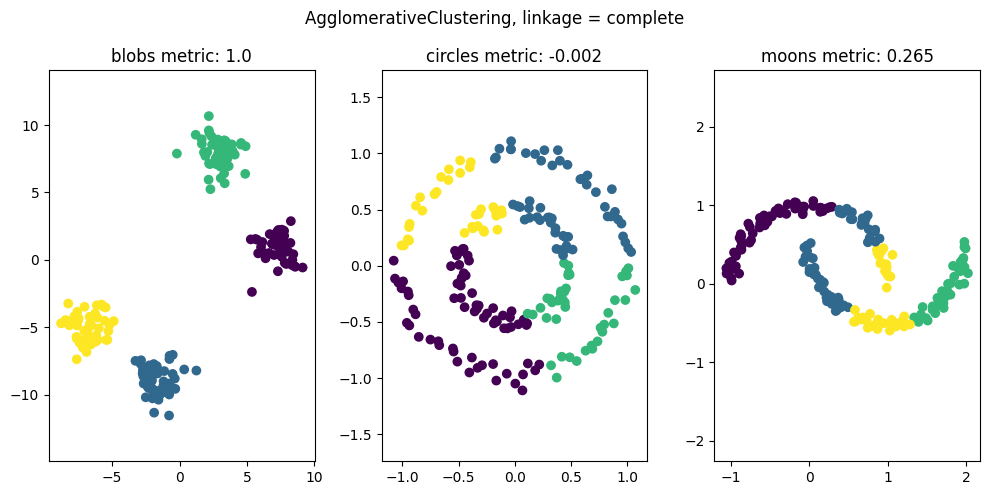

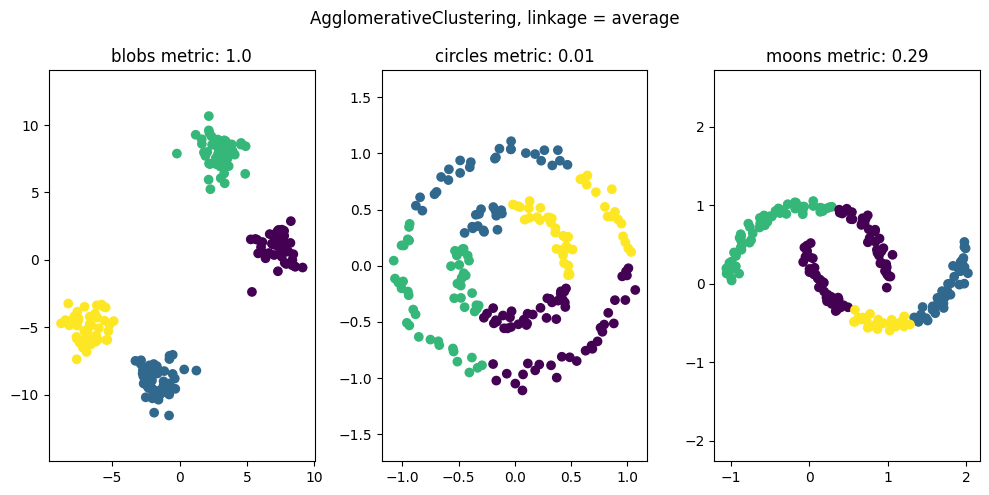

In [137]:
metric = adjusted_rand_score
for link in ['single', 'ward', 'complete', 'average']:
    aggl_cluster = AgglomerativeClustering(linkage=link, n_clusters=4)

    y_model_blobs = aggl_cluster.fit_predict(x_blobs, y_blobs)
    acc_blobs = metric(y_blobs, y_model_blobs)

    y_model_circles = aggl_cluster.fit_predict(x_circles, y_circles)
    acc_circles = metric(y_circles, y_model_circles)

    y_model_moons = aggl_cluster.fit_predict(x_moons, y_moons)
    acc_moons = metric(y_moons, y_model_moons)

    d = [(x_blobs, y_model_blobs), (x_circles, y_model_circles), (x_moons, y_model_moons)]
    l = [f'blobs metric: {round(acc_blobs, 3)}', f'circles metric: {round(acc_circles, 3)}', f'moons metric: {round(acc_moons, 3)}']
    plot_dataset(d, l, title=f'AgglomerativeClustering, linkage = {link}')
    

## K-means directly <a class='anchor' id='3'></a>

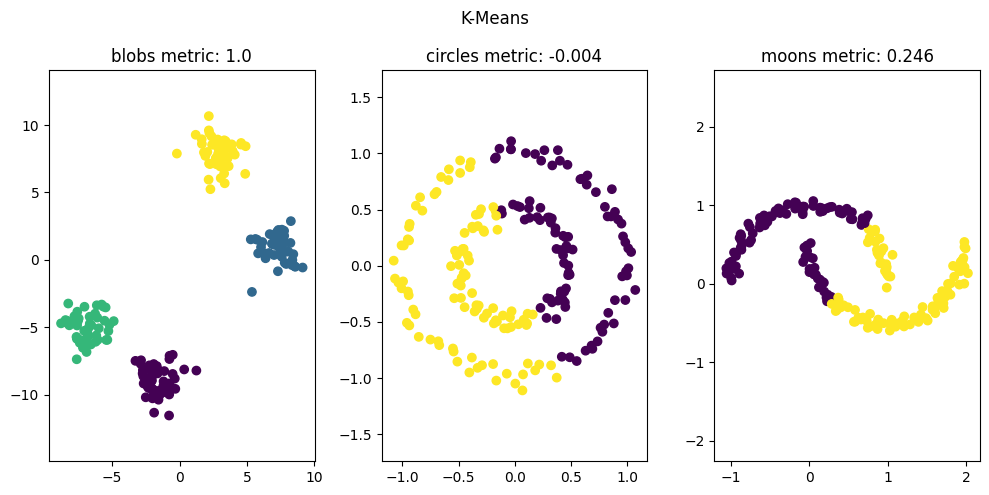

In [138]:
metric = adjusted_rand_score

kmeans_blobs = KMeans(n_clusters=4)
y_model_blobs = kmeans_blobs.fit_predict(x_blobs, y_blobs)
acc_blobs = metric(y_blobs, y_model_blobs)

kmeans_circles = KMeans(n_clusters=2)
y_model_circles = kmeans_circles.fit_predict(x_circles, y_circles)
acc_circles = metric(y_circles, y_model_circles)

kmeans_moons = KMeans(n_clusters=2)
y_model_moons = kmeans_moons.fit_predict(x_moons, y_moons)
acc_moons = metric(y_moons, y_model_moons)

d = [(x_blobs, y_model_blobs), (x_circles, y_model_circles), (x_moons, y_model_moons)]
l = [f'blobs metric: {round(acc_blobs, 3)}', f'circles metric: {round(acc_circles, 3)}', f'moons metric: {round(acc_moons, 3)}']
plot_dataset(d, l, title=f'K-Means')

# Apply first t-SNE to the data and then K-means <a class='anchor' id='4'></a>

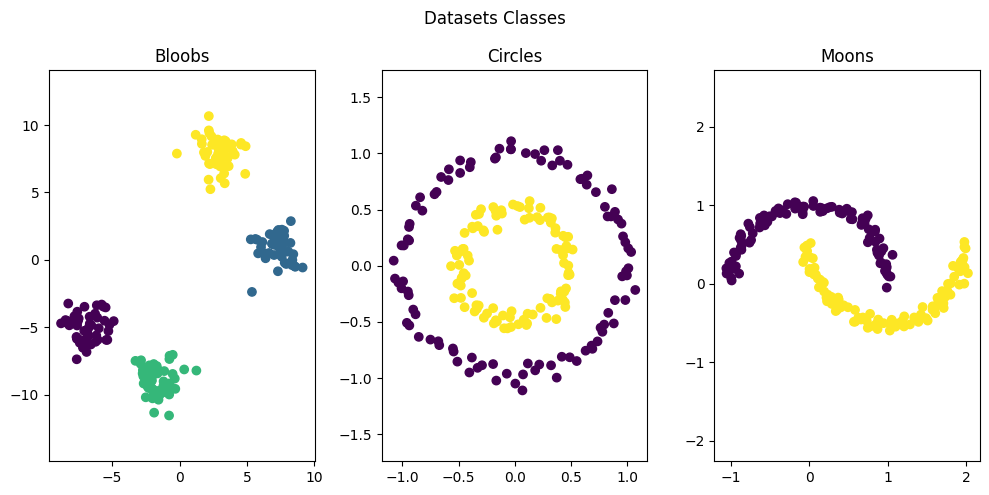

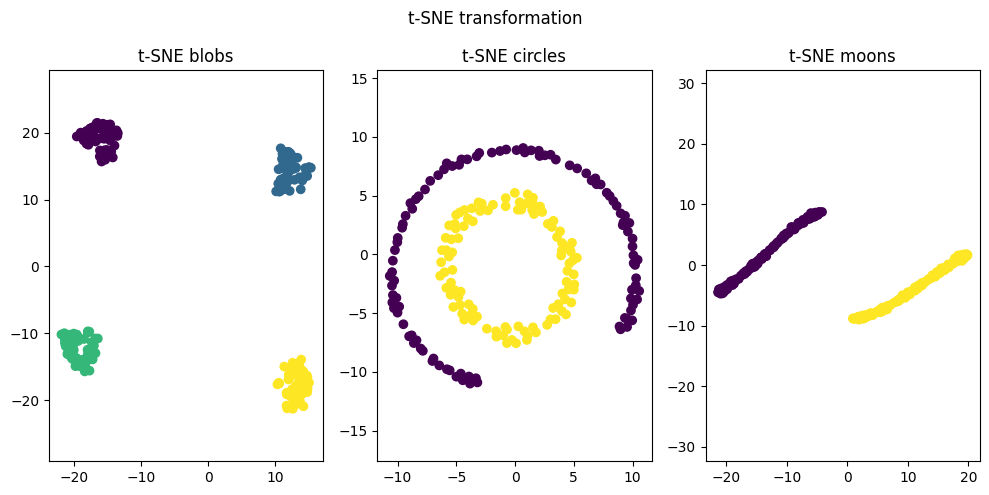

In [ ]:
# apply t-SNE to each of the three dataset

tsne_blobs = TSNE(n_components=2, perplexity=25, )
x_blobs_reduced = tsne_blobs.fit_transform(x_blobs)

tsne_circles = TSNE(n_components=2, 
                    perplexity=30,  
                    # random_state=42, 
                    # early_exaggeration=3
                    )
x_circles_reduced = tsne_blobs.fit_transform(x_circles)

tsne_moons = TSNE(n_components=2, perplexity=25, )
x_moons_reduced = tsne_blobs.fit_transform(x_moons)

d_tsne = [(x_blobs_reduced, y_blobs), (x_circles_reduced, y_circles), (x_moons_reduced, y_moons)]
labels_tsne = ['t-SNE blobs', 't-SNE circles', 't-SNE moons']
plot_dataset(data_sets, labels)
plot_dataset(d_tsne, labels_tsne, title='t-SNE transformation') 

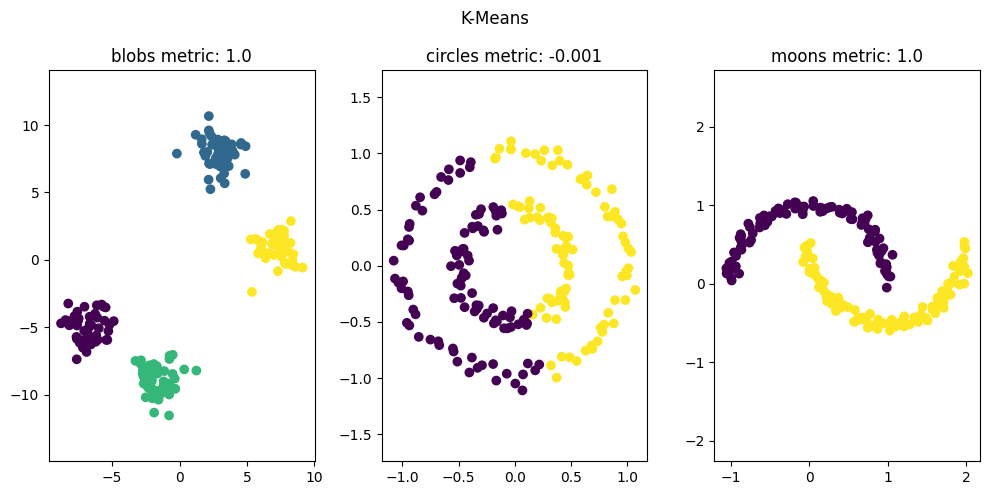

In [147]:
# apply K-means to the t-SNE datasets

metric = adjusted_rand_score

kmeans_blobs = KMeans(n_clusters=4)
y_model_blobs = kmeans_blobs.fit_predict(x_blobs_reduced, y_blobs)
acc_blobs = metric(y_blobs, y_model_blobs)

kmeans_circles = KMeans(n_clusters=2)
y_model_circles = kmeans_circles.fit_predict(x_circles_reduced, y_circles)
acc_circles = metric(y_circles, y_model_circles)

kmeans_moons = KMeans(n_clusters=2)
y_model_moons = kmeans_moons.fit_predict(x_moons_reduced, y_moons)
acc_moons = metric(y_moons, y_model_moons)

d = [(x_blobs, y_model_blobs), (x_circles, y_model_circles), (x_moons, y_model_moons)]
l = [f'blobs metric: {round(acc_blobs, 3)}', f'circles metric: {round(acc_circles, 3)}', f'moons metric: {round(acc_moons, 3)}']
plot_dataset(d, l, title=f'K-Means')